In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2.3.0


In [16]:
def generate_rw(n):
    x = np.array([np.random.normal() for i in range(n)]) + np.array(range(n))
    return x

In [22]:
x1 = generate_rw(12)

In [23]:
x2 = generate_rw(12)

In [24]:
x3 = generate_rw(12)

In [25]:
x4 = generate_rw(12)

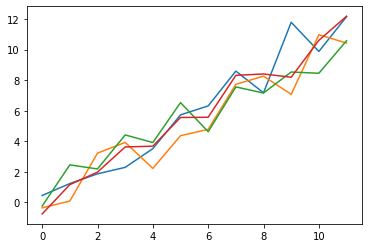

In [26]:
plt.plot(x1)
plt.plot(x2)
plt.plot(x3)
plt.plot(x4)

In [27]:
x1

array([ 0.4535264 ,  1.23181965,  1.87053218,  2.29232539,  3.51700023,
        5.72609993,  6.31491472,  8.59190445,  7.17184203, 11.78635045,
        9.87787941, 12.15221253])

In [29]:
n = 12
x = np.array([np.array(range(n)), np.array(range(n)), np.array(range(n)), np.array(range(n)) ])

In [30]:

x = x.reshape(4, 12, 1)

In [31]:
y = np.array([x1, x2, x3, x4])

In [73]:
model = Sequential()
model.add(LSTM(12, input_shape=(12,1)))
model.add(Dense(8))
model.add(Dense(12))
model.compile(loss='mse', optimizer='adam')
history = model.fit(x, y, epochs = 350, batch_size=32, verbose=1, shuffle=False)
plt.plot(history.history['loss'])

Epoch 1/350


KeyboardInterrupt: 

In [35]:
model.predict(np.array(range(n)).reshape(1, 12, 1))

array([[-0.22438836,  1.2347615 ,  2.342803  ,  3.5641952 ,  3.3337584 ,
         5.4930854 ,  5.325968  ,  8.050941  ,  7.7651772 ,  8.921716  ,
        10.056444  , 11.203426  ]], dtype=float32)

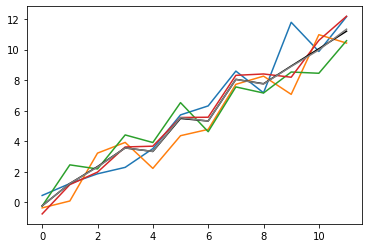

In [48]:
plt.plot(x1)
plt.plot(x2)
plt.plot(x3)
plt.plot(x4)
plt.plot(model.predict(np.array(range(n)).reshape(1, 12, 1)).T, color='black')
plt.plot([ np.array([x1, x2, x3, x4])[:, i].mean() for  i in range(n)], color='grey')

In [46]:
medias = [ np.array([x1, x2, x3, x4])[:, i].mean() for  i in range(n)]
medias, model.predict(np.array(range(n)).reshape(1, 12, 1)).T

([-0.22402913167372734,
  1.2354040406739786,
  2.316001641333971,
  3.5649015199174388,
  3.3348107827216396,
  5.54372966011116,
  5.3234048121227575,
  8.047174973809224,
  7.749125006672095,
  8.894940167636657,
  9.976674546896513,
  11.335823987471924],
 array([[-0.22438836],
        [ 1.2347615 ],
        [ 2.342803  ],
        [ 3.5641952 ],
        [ 3.3337584 ],
        [ 5.4930854 ],
        [ 5.325968  ],
        [ 8.050941  ],
        [ 7.7651772 ],
        [ 8.921716  ],
        [10.056444  ],
        [11.203426  ]], dtype=float32))

In [58]:
amostra = []
for  i in range(10):
    if (i % 2 == 0):
        amostra.append(1)
    else:
        amostra.append(0)

In [59]:
amostra

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [54]:
amostra_2 = []
for  i in range(1, 11):
    if (i % 2 == 0):
        amostra_2.append(1)
    else:
        amostra_2.append(0)

In [55]:
amostra_2

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [60]:
x = np.array([amostra, 
              amostra_2,
             amostra,
             amostra_2,
             amostra,
             amostra_2,
             amostra,
             amostra_2,
             amostra,
             amostra_2])

In [61]:
x

array([[1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]])

In [62]:
x = x.reshape(10, 10, 1)

In [66]:
y = np.array(amostra)

Epoch 1/350
1/1 [==============================] - 0s 15ms/step - loss: 0.5923
Epoch 2/350
1/1 [==============================] - 0s 5ms/step - loss: 0.5840
Epoch 3/350
1/1 [==============================] - 0s 8ms/step - loss: 0.5757
Epoch 4/350
1/1 [==============================] - 0s 6ms/step - loss: 0.5674
Epoch 5/350
1/1 [==============================] - 0s 2ms/step - loss: 0.5593
Epoch 6/350
1/1 [==============================] - 0s 2ms/step - loss: 0.5512
Epoch 7/350
1/1 [==============================] - 0s 4ms/step - loss: 0.5431
Epoch 8/350
1/1 [==============================] - 0s 3ms/step - loss: 0.5352
Epoch 9/350
1/1 [==============================] - 0s 7ms/step - loss: 0.5273
Epoch 10/350
1/1 [==============================] - 0s 8ms/step - loss: 0.5194
Epoch 11/350
1/1 [==============================] - 0s 2ms/step - loss: 0.5117
Epoch 12/350
1/1 [==============================] - 0s 3ms/step - loss: 0.5039
Epoch 13/350
1/1 [==============================] - 0s 0s/st

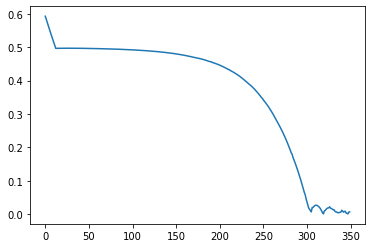

In [86]:
model = Sequential()
model.add(LSTM(1, input_shape=(10,1)))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(x, y, epochs = 350, batch_size=16, verbose=1, shuffle=False)
plt.plot(history.history['loss'])

In [90]:
model.predict(np.array(amostra).reshape(1, 10, 1))

array([[0.99508244]], dtype=float32)

In [91]:
amostra

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [92]:
model.predict(np.array(amostra_2).reshape(1, 10, 1))

array([[0.00164802]], dtype=float32)

In [95]:
x = np.array([[1,2,3,4,5,6,7,8,9], 
              [2,3,4,5,6,7,8,9,10],  
              [3,4,5,6,7,8,9,10,11],  
              [4,5,6,7,8,9,10,11,12], 
              [6,7,8,9,10,11,12,13,14],
              [7,8,9,10,11,12,13,14,15],
             [8,9,10,11,12,13,14, 15, 16],
             [9,10,11,12,13,14,15,16,17],
             [10,11,12,13,14,15,16,17,18],
             [11,12,13,14,15,16,17,18,19],
             [12,13,14,15,16,17,18,19,20]])

x = x.reshape(11, 9, 1)

y = np.array([[10, 11, 12],
              [11, 12, 13],
              [12, 13, 14],
              [13, 14, 15],
               [15, 16, 17],
             [16,17,18],
              [17,18,19],
              [18,19,20],
             [19,20,21],
              [20,21,22],
             [21,22,23],
             ])

Epoch 1/400
1/1 [==============================] - 0s 3ms/step - loss: 16.6767
Epoch 2/400
1/1 [==============================] - 0s 3ms/step - loss: 16.6615
Epoch 3/400
1/1 [==============================] - 0s 4ms/step - loss: 16.6468
Epoch 4/400
1/1 [==============================] - 0s 10ms/step - loss: 16.6327
Epoch 5/400
1/1 [==============================] - 0s 2ms/step - loss: 16.6191
Epoch 6/400
1/1 [==============================] - 0s 3ms/step - loss: 16.6060
Epoch 7/400
1/1 [==============================] - 0s 5ms/step - loss: 16.5933
Epoch 8/400
1/1 [==============================] - 0s 10ms/step - loss: 16.5809
Epoch 9/400
1/1 [==============================] - 0s 8ms/step - loss: 16.5687
Epoch 10/400
1/1 [==============================] - 0s 2ms/step - loss: 16.5564
Epoch 11/400
1/1 [==============================] - 0s 5ms/step - loss: 16.5438
Epoch 12/400
1/1 [==============================] - 0s 5ms/step - loss: 16.5307
Epoch 13/400
1/1 [=============================

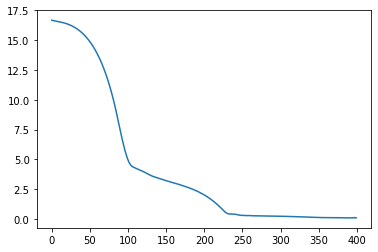

In [104]:
model = Sequential()
model.add(LSTM(3, input_shape=(9,1)))
model.add(Dense(16)) #activation=tf.nn.relu activation=tf.nn.softmax
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(3))
model.compile(loss='mae', optimizer='adam') #metrics=["mae", "acc"]
history = model.fit(x, y, epochs = 400, batch_size=32, verbose=1, shuffle=False)
plt.plot(history.history['loss'])

In [110]:
model.predict(np.array([[6,7,8,9,10,11,12,13,14]]).reshape(1, 9,1))

array([[14.828434, 15.844542, 16.888561]], dtype=float32)

In [111]:
model.predict(np.array([[ 5, 6,7,8,9,10,11,12,13]]).reshape(1, 9,1))

array([[13.901887, 14.896521, 15.932099]], dtype=float32)

In [112]:
model.predict(np.array([[6,7,8,9,10,11,12,13,14]]).reshape(1, 9,1))

array([[14.828434, 15.844542, 16.888561]], dtype=float32)

In [113]:
model.predict(np.array([[106,107,108,109,110,111,112,113,114]]).reshape(1, 9,1))

array([[20.679535, 21.57244 , 22.355162]], dtype=float32)

In [114]:
x = np.array([[1,2], 
              [2,3],  
              [3,4],  
              [4,5], 
              [6,7],
              [7,8],
             [8,9],
             [9,10],
             [10,11],
             [11,12],
             [12,13]])

x = x.reshape(11, 2, 1)

y = np.array([[2],
              [5],
              [7],
              [9],
               [13],
             [15],
              [17],
              [19],
             [21],
              [23],
             [25],
             ])

Epoch 1/400
1/1 [==============================] - 0s 370ms/step - loss: 14.1835
Epoch 2/400
1/1 [==============================] - 0s 0s/step - loss: 14.1665
Epoch 3/400
1/1 [==============================] - 0s 0s/step - loss: 14.1493
Epoch 4/400
1/1 [==============================] - 0s 0s/step - loss: 14.1320
Epoch 5/400
1/1 [==============================] - 0s 0s/step - loss: 14.1145
Epoch 6/400
1/1 [==============================] - 0s 0s/step - loss: 14.0965
Epoch 7/400
1/1 [==============================] - 0s 0s/step - loss: 14.0782
Epoch 8/400
1/1 [==============================] - 0s 0s/step - loss: 14.0593
Epoch 9/400
1/1 [==============================] - 0s 16ms/step - loss: 14.0400
Epoch 10/400
1/1 [==============================] - 0s 10ms/step - loss: 14.0201
Epoch 11/400
1/1 [==============================] - 0s 41ms/step - loss: 13.9997
Epoch 12/400
1/1 [==============================] - 0s 10ms/step - loss: 13.9786
Epoch 13/400
1/1 [==============================] 

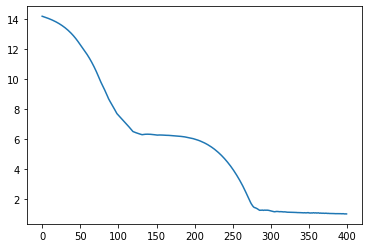

In [115]:
model = Sequential()
model.add(LSTM(1, input_shape=(2,1)))
model.add(Dense(16)) #activation=tf.nn.relu activation=tf.nn.softmax
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam') #metrics=["mae", "acc"]
history = model.fit(x, y, epochs = 400, batch_size=32, verbose=1, shuffle=False)
plt.plot(history.history['loss'])

In [116]:
model.predict(np.array([2,3]).reshape(1, 2, 1))

array([[4.982649]], dtype=float32)

In [118]:
model.predict(np.array([5, 6]).reshape(1, 2, 1))

array([[10.295499]], dtype=float32)